In [7]:
import pandas as pd

# Load the datasets
try:
    historical_data = pd.read_csv('historical_data.csv', nrows = 50000)
    fear_greed_index = pd.read_csv('fear_greed_index.csv')

    # Convert 'Timestamp IST' to a standard date format and extract the date
    historical_data['Date'] = pd.to_datetime(historical_data['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce').dt.date

    # Convert 'date' in fear_greed_index to a standard date format
    fear_greed_index['date'] = pd.to_datetime(fear_greed_index['date'], errors='coerce').dt.date

    # Merge the two dataframes on the common date
    merged_data = pd.merge(historical_data, fear_greed_index, how='inner', left_on='Date', right_on='date')

    # Drop the redundant date columns
    merged_data = merged_data.drop(columns=['Date', 'date'])

    # Display the first few rows of the merged data to show the join was successful
    print("Merged Dataset (first 5 rows):")
    print(merged_data.head())

except FileNotFoundError:
    print("Error: One or both of the CSV files were not found. Please make sure 'historical_data.csv' and 'fear_greed_index.csv' are in the same directory.")
except Exception as e:
    print(f"An error occurred: {e}")


Merged Dataset (first 5 rows):
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Orde

This cell imports the pandas library to handle data manipulation. It loads two CSV files, 'historical_data.csv' and 'fear_greed_index.csv', into DataFrames. The key step is preparing and merging these datasets. It converts the date-time columns in both DataFrames into a standardized date format. This allows for a successful inner merge of the two datasets, combining crypto trading data with the corresponding daily sentiment scores. Finally, it prints the first five rows of the merged DataFrame to verify that the join was successful and the data is correctly structured for analysis.

In [8]:
merged_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,1733117400,80,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,1733117400,80,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,1733117400,80,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,1733117400,80,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,1733117400,80,Extreme Greed


In [12]:
df = merged_data
df.shape

(49994, 19)

In [13]:
df['Closed PnL'].value_counts()

,count
Closed PnL,
0.000000,24280
0.146908,80
9.903600,67
88.459120,62
1.955000,45
...,...
1.294040,1
11.029788,1
5.204652,1


This cell uses the value_counts() method on the 'Closed PnL' column to understand the distribution of profit and loss values. The output reveals that a large number of trades, 24,280 to be exact, resulted in a closed PnL of $0.00. This information is important for understanding the nature of the trading data, as many trades may have been opened and closed with no net gain or loss.

In [14]:
sentiment_performance = df.groupby('classification').agg(
        Average_Closed_PnL=('Closed PnL', 'mean'),
        Average_Trade_Size_USD=('Size USD', 'mean'),
        Number_of_Trades=('Order ID', 'count')
    ).reset_index()

This cell performs a key step in the analysis by grouping the data by the classification column from the Fear & Greed Index. It then aggregates the data to calculate three important metrics for each sentiment category:

Average_Closed_PnL: The mean profit/loss per trade.

Average_Trade_Size_USD: The mean trade size in USD.

Number_of_Trades: The total count of trades that occurred under each sentiment.
This new sentiment_performance DataFrame is the basis for the core analysis in the following cells.

In [15]:
sentiment_performance

,classification,Average_Closed_PnL,Average_Trade_Size_USD,Number_of_Trades
0,Extreme Fear,204.336799,9791.737211,1746
1,Extreme Greed,160.154764,7940.375168,9708
2,Fear,145.656679,22390.603113,12532
3,Greed,92.053203,13397.434281,16315
4,Neutral,97.246326,12009.622124,9693


from matplotlib import pyplot as plt
sentiment_performance['Average_Closed_PnL'].plot(kind='hist', bins=20, title='Average_Closed_PnL')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sentiment_performance['Average_Trade_Size_USD'].plot(kind='hist', bins=20, title='Average_Trade_Size_USD')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sentiment_performance['Number_of_Trades'].plot(kind='hist', bins=20, title='Number_of_Trades')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
sentiment_performance.groupby('classification').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sentiment_performance.plot(kind='scatter', x='Average_Closed_PnL', y='Average_Trade_Size_USD', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sentiment_performance.plot(kind='scatter', x='Average_Trade_Size_USD', y='Number_of_Trades', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sentiment_performance['Average_Closed_PnL'].plot(kind='line', figsize=(8, 4), title='Average_Closed_PnL')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
sentiment_performance['Average_Trade_Size_USD'].plot(kind='line', figsize=(8, 4), title='Average_Trade_Size_USD')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
sentiment_performance['Number_of_Trades'].plot(kind='line', figsize=(8, 4), title='Number_of_Trades')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(sentiment_performance['classification'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(sentiment_performance, x='Average_Closed_PnL', y='classification', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(sentiment_performance['classification'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(sentiment_performance, x='Average_Trade_Size_USD', y='classification', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(sentiment_performance['classification'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(sentiment_performance, x='Number_of_Trades', y='classification', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/tmp/ipython-input-1742218924.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Average_Closed_PnL', data=sentiment_performance, palette='viridis')


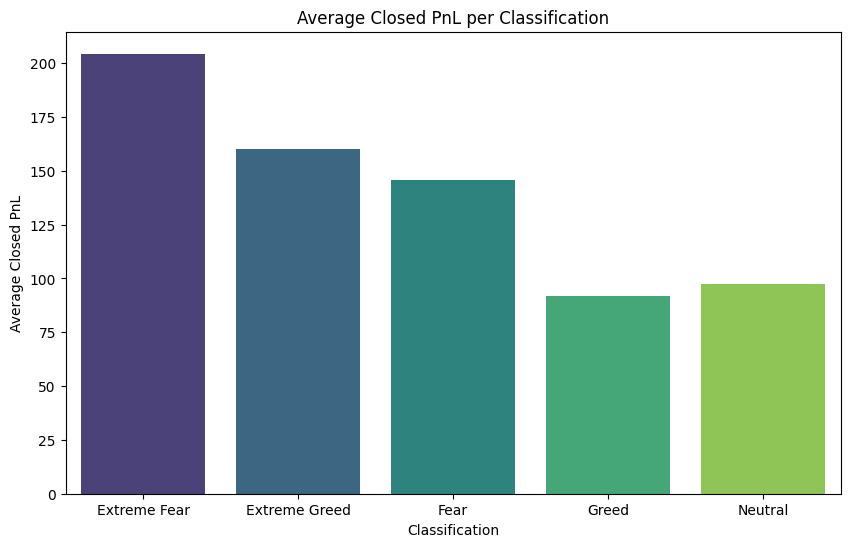

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='classification', y='Average_Closed_PnL', data=sentiment_performance, palette='viridis')
plt.title('Average Closed PnL per Classification')
plt.xlabel('Classification')
plt.ylabel('Average Closed PnL')
plt.show()

 Using matplotlib and seaborn, this cell generates a bar plot to visually represent the Average_Closed_PnL for each sentiment classification. The visualization makes it easy to compare the profitability of trades across different market sentiments, showing which sentiment periods, on average, yielded the highest returns per trade.

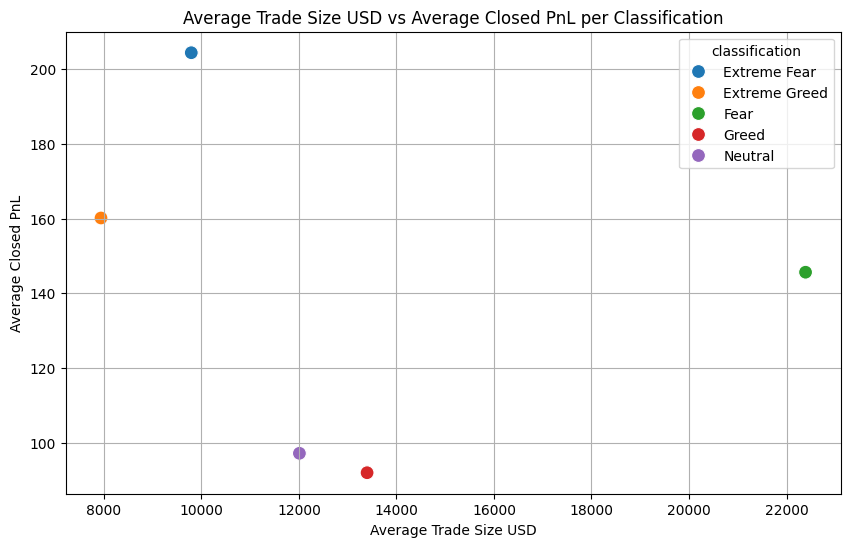

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average_Trade_Size_USD', y='Average_Closed_PnL', data=sentiment_performance, hue='classification', s=100)
plt.title('Average Trade Size USD vs Average Closed PnL per Classification')
plt.xlabel('Average Trade Size USD')
plt.ylabel('Average Closed PnL')
plt.grid(True)
plt.show()

/tmp/ipython-input-2080029298.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Number_of_Trades', data=sentiment_performance, palette='viridis')


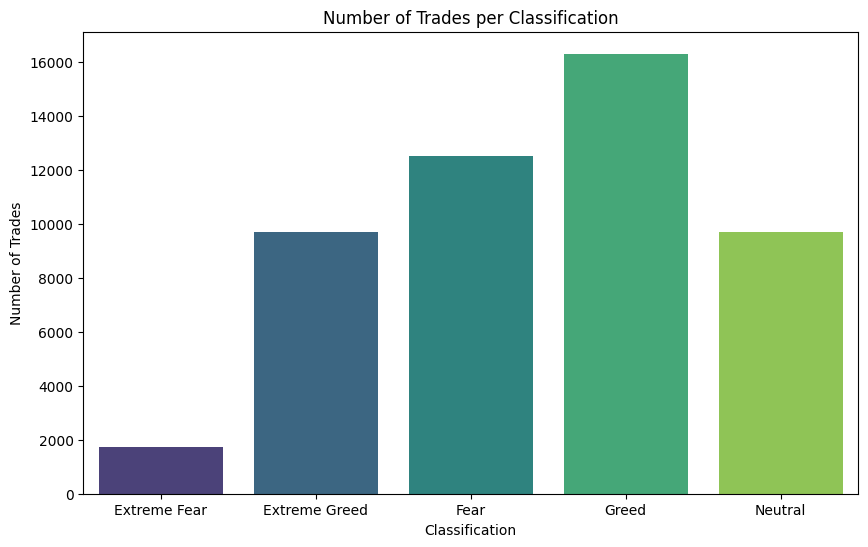

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='classification', y='Number_of_Trades', data=sentiment_performance, palette='viridis')
plt.title('Number of Trades per Classification')
plt.xlabel('Classification')
plt.ylabel('Number of Trades')
plt.show()

In [23]:
df = df.merge(sentiment_performance, on='classification', how='left')
df['PnL_per_USD'] = df['Average_Closed_PnL'] / df['Average_Trade_Size_USD']
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Average_Closed_PnL_x,Average_Trade_Size_USD_x,Number_of_Trades_x,Average_Closed_PnL_y,Average_Trade_Size_USD_y,Number_of_Trades_y,Average_Closed_PnL,Average_Trade_Size_USD,Number_of_Trades,PnL_per_USD
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,160.154764,7940.375168,9708,160.154764,7940.375168,9708,160.154764,7940.375168,9708,0.02017
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,160.154764,7940.375168,9708,160.154764,7940.375168,9708,160.154764,7940.375168,9708,0.02017
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,160.154764,7940.375168,9708,160.154764,7940.375168,9708,160.154764,7940.375168,9708,0.02017
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,160.154764,7940.375168,9708,160.154764,7940.375168,9708,160.154764,7940.375168,9708,0.02017
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,160.154764,7940.375168,9708,160.154764,7940.375168,9708,160.154764,7940.375168,9708,0.02017


In [25]:
#Sort by PnL_per_USD to see which sentiment is most efficient.
df.sort_values(by= 'PnL_per_USD', ascending = False)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Average_Closed_PnL_x,Average_Trade_Size_USD_x,Number_of_Trades_x,Average_Closed_PnL_y,Average_Trade_Size_USD_y,Number_of_Trades_y,Average_Closed_PnL,Average_Trade_Size_USD,Number_of_Trades,PnL_per_USD
38901,0x420ab45e0bd8863569a5efbb9c05d91f40624641,BTC,81360.000000,0.00620,504.43,SELL,11-03-2025 23:16,-1.076000e+00,Open Short,0.00000,...,204.336799,9791.737211,1746,204.336799,9791.737211,1746,204.336799,9791.737211,1746,0.020868
38900,0x420ab45e0bd8863569a5efbb9c05d91f40624641,BTC,81360.000000,0.00015,12.20,SELL,11-03-2025 23:16,-1.075850e+00,Open Short,0.00000,...,204.336799,9791.737211,1746,204.336799,9791.737211,1746,204.336799,9791.737211,1746,0.020868
38899,0x420ab45e0bd8863569a5efbb9c05d91f40624641,BTC,81360.000000,0.00700,569.52,SELL,11-03-2025 23:16,-1.068850e+00,Open Short,0.00000,...,204.336799,9791.737211,1746,204.336799,9791.737211,1746,204.336799,9791.737211,1746,0.020868
38898,0x420ab45e0bd8863569a5efbb9c05d91f40624641,BTC,81360.000000,0.00700,569.52,SELL,11-03-2025 23:16,-1.061850e+00,Open Short,0.00000,...,204.336799,9791.737211,1746,204.336799,9791.737211,1746,204.336799,9791.737211,1746,0.020868
38929,0x420ab45e0bd8863569a5efbb9c05d91f40624641,BTC,81360.000000,0.19737,16058.02,SELL,11-03-2025 23:16,-1.718230e+00,Open Short,0.00000,...,204.336799,9791.737211,1746,204.336799,9791.737211,1746,204.336799,9791.737211,1746,0.020868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37458,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,kBONK,0.012344,34700.00000,428.34,BUY,02-04-2025 13:01,-9.704180e+05,Close Short,2.42900,...,145.656679,22390.603113,12532,145.656679,22390.603113,12532,145.656679,22390.603113,12532,0.006505
37457,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,kBONK,0.012344,88581.00000,1093.44,BUY,02-04-2025 13:01,-1.058999e+06,Close Short,6.20067,...,145.656679,22390.603113,12532,145.656679,22390.603113,12532,145.656679,22390.603113,12532,0.006505
37456,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,kBONK,0.012344,53175.00000,656.39,BUY,02-04-2025 13:01,-1.112174e+06,Close Short,3.72225,...,145.656679,22390.603113,12532,145.656679,22390.603113,12532,145.656679,22390.603113,12532,0.006505
37455,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,kBONK,0.012344,32522.00000,401.45,BUY,02-04-2025 13:01,-1.144696e+06,Close Short,2.27654,...,145.656679,22390.603113,12532,145.656679,22390.603113,12532,145.656679,22390.603113,12532,0.006505


In [27]:
#Identify underperformers
low_pnl = df[df['Average_Closed_PnL'] < 0]['classification'].unique()
low_pnl

array([], dtype=object)

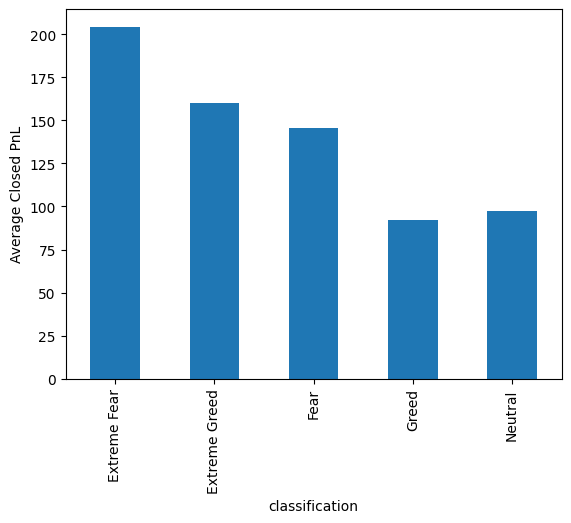

In [28]:
import matplotlib.pyplot as plt

# Average PnL per classification
sentiment_performance.plot(
    x='classification', y='Average_Closed_PnL', kind='bar', legend=False
)
plt.ylabel('Average Closed PnL')
plt.show()


In [ ]:
df[df['classification'] == 'Extreme Fear']

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Average_Closed_PnL_x,Average_Trade_Size_USD_x,Number_of_Trades_x,Average_Closed_PnL_y,Average_Trade_Size_USD_y,Number_of_Trades_y,Average_Closed_PnL,Average_Trade_Size_USD,Number_of_Trades,PnL_per_USD
190,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,DYDX,0.60975,2834.9,1728.58,BUY,04-03-2025 23:23,0.00000,Open Long,0.000000,...,204.336799,9791.737211,1746,204.336799,9791.737211,1746,204.336799,9791.737211,1746,0.020868
191,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,DYDX,0.60975,190.9,116.40,BUY,04-03-2025 23:23,2834.90000,Open Long,0.000000,...,204.336799,9791.737211,1746,204.336799,9791.737211,1746,204.336799,9791.737211,1746,0.020868
192,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,DYDX,0.60976,2818.6,1718.67,BUY,04-03-2025 23:23,3025.80000,Open Long,0.000000,...,204.336799,9791.737211,1746,204.336799,9791.737211,1746,204.336799,9791.737211,1746,0.020868
193,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,DYDX,0.60981,3689.6,2249.95,BUY,04-03-2025 23:23,5844.40000,Open Long,0.000000,...,204.336799,9791.737211,1746,204.336799,9791.737211,1746,204.336799,9791.737211,1746,0.020868
194,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,DYDX,0.61007,3688.1,2250.00,BUY,04-03-2025 23:23,9534.00000,Open Long,0.000000,...,204.336799,9791.737211,1746,204.336799,9791.737211,1746,204.336799,9791.737211,1746,0.020868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44886,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,@4,2.77000,36.0,99.72,SELL,06-09-2024 21:38,3915.21926,Sell,-29.852304,...,204.336799,9791.737211,1746,204.336799,9791.737211,1746,204.336799,9791.737211,1746,0.020868
44887,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,@4,2.76600,32.0,88.51,SELL,06-09-2024 21:38,3879.21926,Sell,-26.663381,...,204.336799,9791.737211,1746,204.336799,9791.737211,1746,204.336799,9791.737211,1746,0.020868
44888,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,@4,2.76180,32.0,88.38,SELL,06-09-2024 21:38,3847.21926,Sell,-26.797781,...,204.336799,9791.737211,1746,204.336799,9791.737211,1746,204.336799,9791.737211,1746,0.020868
44889,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,@4,2.75770,32.0,88.25,SELL,06-09-2024 21:38,3815.21926,Sell,-26.928981,...,204.336799,9791.737211,1746,204.336799,9791.737211,1746,204.336799,9791.737211,1746,0.020868


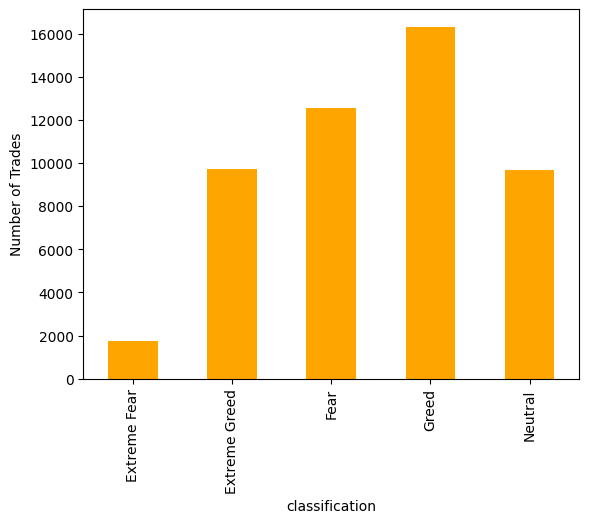

In [31]:
sentiment_performance.plot(
    x='classification', y='Number_of_Trades', kind='bar', color='orange', legend=False
)
plt.ylabel('Number of Trades')
plt.show()

In [36]:
sentiment_performance['Total_PnL'] = sentiment_performance['Average_Closed_PnL'] * sentiment_performance['Number_of_Trades']
sentiment_performance['Average_PnL_per_USD'] = (
    df.groupby('classification')['PnL_per_USD'].mean().values
)
display(sentiment_performance)

,classification,Average_Closed_PnL,Average_Trade_Size_USD,Number_of_Trades,Total_PnL,Average_PnL_per_USD
0,Extreme Fear,204.336799,9791.737211,1746,3.567721e+05,0.020868
1,Extreme Greed,160.154764,7940.375168,9708,1.554782e+06,0.020170
2,Fear,145.656679,22390.603113,12532,1.825370e+06,0.006505
3,Greed,92.053203,13397.434281,16315,1.501848e+06,0.006871
4,Neutral,97.246326,12009.622124,9693,9.426086e+05,0.008097


 This cell adds more calculated columns to the sentiment_performance DataFrame for a deeper analysis.

Total_PnL: Calculated by multiplying the average PnL by the number of trades for each category. This metric reveals which sentiment periods were most profitable in aggregate.

Average_PnL_per_USD: Calculated by dividing the average PnL by the average trade size in USD. This metric measures the efficiency of trades, showing which sentiment periods generated the most profit per dollar invested on average.

/tmp/ipython-input-2468033411.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Average_Closed_PnL', data=sentiment_performance.sort_values('Average_Closed_PnL', ascending=False), palette='viridis')


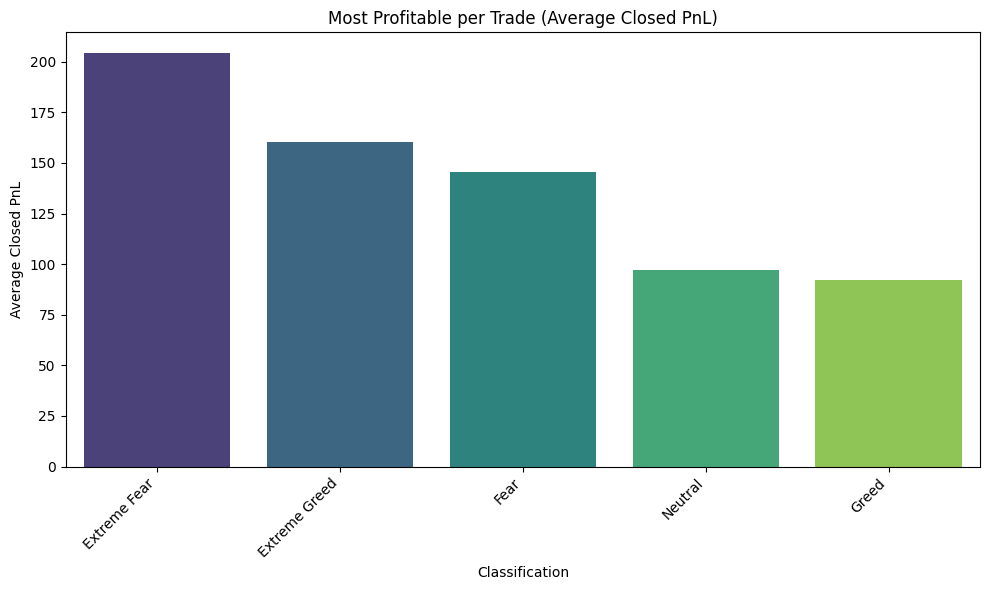

/tmp/ipython-input-2468033411.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Total_PnL', data=sentiment_performance.sort_values('Total_PnL', ascending=False), palette='viridis')


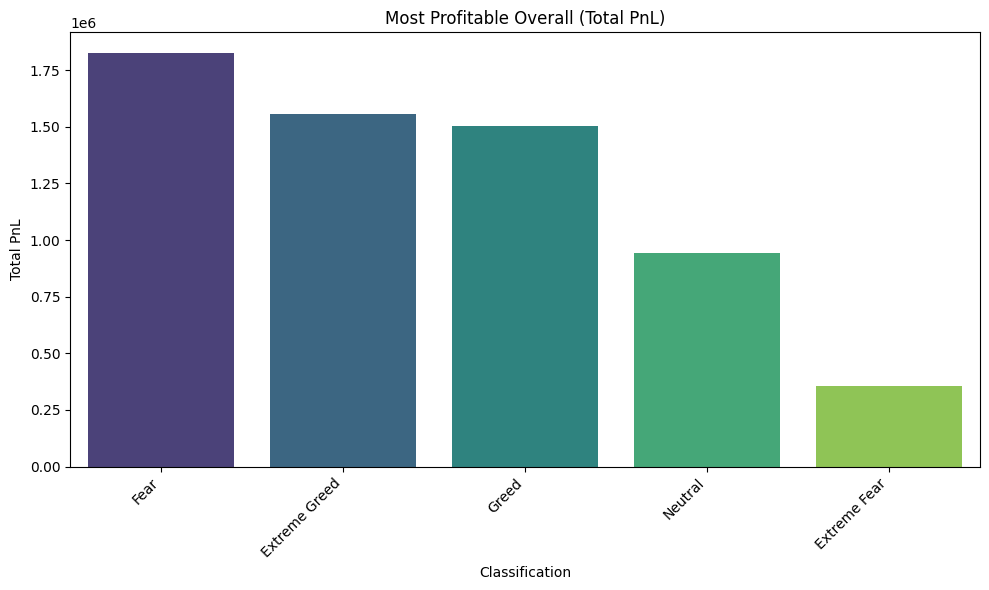

/tmp/ipython-input-2468033411.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Average_PnL_per_USD', data=sentiment_performance.sort_values('Average_PnL_per_USD', ascending=False), palette='viridis')


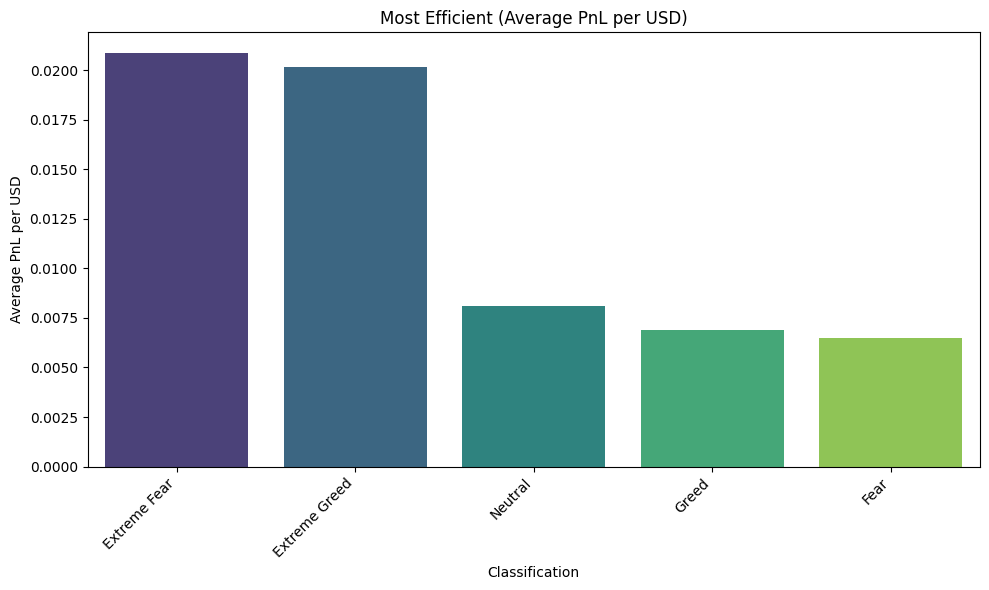

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chart 1: Most profitable per trade (Average_Closed_PnL)
plt.figure(figsize=(10, 6))
sns.barplot(x='classification', y='Average_Closed_PnL', data=sentiment_performance.sort_values('Average_Closed_PnL', ascending=False), palette='viridis')
plt.title('Most Profitable per Trade (Average Closed PnL)')
plt.xlabel('Classification')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Chart 2: Most profitable overall (Total_PnL)
plt.figure(figsize=(10, 6))
sns.barplot(x='classification', y='Total_PnL', data=sentiment_performance.sort_values('Total_PnL', ascending=False), palette='viridis')
plt.title('Most Profitable Overall (Total PnL)')
plt.xlabel('Classification')
plt.ylabel('Total PnL')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Chart 3: Most efficient (Average_PnL_per_USD)
plt.figure(figsize=(10, 6))
sns.barplot(x='classification', y='Average_PnL_per_USD', data=sentiment_performance.sort_values('Average_PnL_per_USD', ascending=False), palette='viridis')
plt.title('Most Efficient (Average PnL per USD)')
plt.xlabel('Classification')
plt.ylabel('Average PnL per USD')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 This cell creates three separate bar charts to visualize the newly calculated performance metrics.

Average Closed PnL: A bar chart sorted to show that 'Extreme Fear' has the highest average PnL per trade, followed by 'Extreme Greed' and 'Fear'.

Total PnL: This chart shows that the 'Fear' and 'Greed' categories generated the largest aggregate profits, likely due to the higher volume of trades during those periods.

Average PnL per USD: This chart visualizes trade efficiency, with 'Extreme Fear' and 'Extreme Greed' showing the highest return on investment per dollar traded.